In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('C:/Users/adith/Desktop/Datasets/emnist-letters-train.csv')
test_df = pd.read_csv('C:/Users/adith/Desktop/Datasets/emnist-letters-test.csv')

In [3]:
y_train = train_df["23"]

In [4]:
X_train = train_df.drop(train_df.columns[0], axis=1)

In [5]:
y_test = test_df["1"]

In [6]:
X_test = test_df.drop(test_df.columns[0], axis=1)

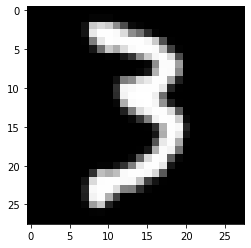

In [7]:
z = np.array(X_train).reshape(X_train.shape[0],28,28)
plt.imshow(z[55,:,:],cmap='gray')

In [19]:

#     def __init__(self, k):
#         self.k = k
#         self.eps = 1e-8

def train(X, y):
    X_train = X
    y_train = y

def predict(X_test, num_loops=0):
    if num_loops == 0:
        distances = compute_distance_vectorized(X_test,X_train)
    return predict_labels(distances)

def compute_distance_two_loops(X_test,X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            distances[i, j] = np.sqrt(1e-8 + np.sum((X_test[i, :] - X_train[j, :]) ** 2))

    return distances

def compute_distance_one_loop(X_test,X_train):

    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        distances[i, :] = np.sqrt(1e-8 + np.sum((X_train - X_test[i, :]) ** 2, axis=1))

    return distances

def compute_distance_vectorized(X_test,X_train):

    X_test_squared = np.sum(X_test ** 2, axis=1)
    X_train_squared = np.sum(X_train ** 2, axis=1)
    two_X_test_X_train = np.dot(X_test, X_train.T)

    return np.sqrt(1e-8 + X_test_squared - 2 * two_X_test_X_train + X_train_squared.T)

def predict_labels(distances,y_train,k):
    num_test = distances.shape[0]
    y_pred = np.zeros(num_test)

    for i in range(num_test):
        y_indices = np.argsort(distances[i, :])
        k_closest_classes = y_train[y_indices[: k]].astype(int)
        y_pred[i] = np.argmax(np.bincount(k_closest_classes))

    return y_pred

In [20]:
# KNN = KNearestNeighbor(k=1)
X = np.array(X_train)
y = np.array(y_train)
X_t = np.array(X_test)
y_t = np.array(y_test)

In [ ]:
train(X,y)
y_pred = predict(X_t, num_loops=0)
print(f"Accuracy: {sum(y_pred == y_t) / y_t.shape[0]}")